In [4]:
from metaflow import Metaflow, Flow, get_metadata,Run,metadata
latest_run = Flow('PSSExperimentationFlow').latest_successful_run

In [5]:
import reporting_util
analytics = latest_run.data.history 

In [7]:
models = latest_run.data.models

In [10]:
plt = reporting_util.make_loss_plots(analytics)
plt.show()

In [9]:
from sklearn.metrics import classification_report

for result in analytics:
    report = classification_report(result.test_targets, result.test_preds)
    print('>>> %s' % result.architecture)
    print(report)

>>> VGG16 page_1 class_2
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       109
           1       0.88      0.92      0.90       150

    accuracy                           0.88       259
   macro avg       0.88      0.88      0.88       259
weighted avg       0.88      0.88      0.88       259

>>> VGG16 page_1 class_4
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       106
           1       0.86      0.95      0.90       153

    accuracy                           0.88       259
   macro avg       0.89      0.87      0.87       259
weighted avg       0.88      0.88      0.88       259

>>> VGG16 page_2 class_2
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       109
           1       0.92      0.93      0.92       150

    accuracy                           0.91       259
   macro avg       0.91      0.91      0.91       259

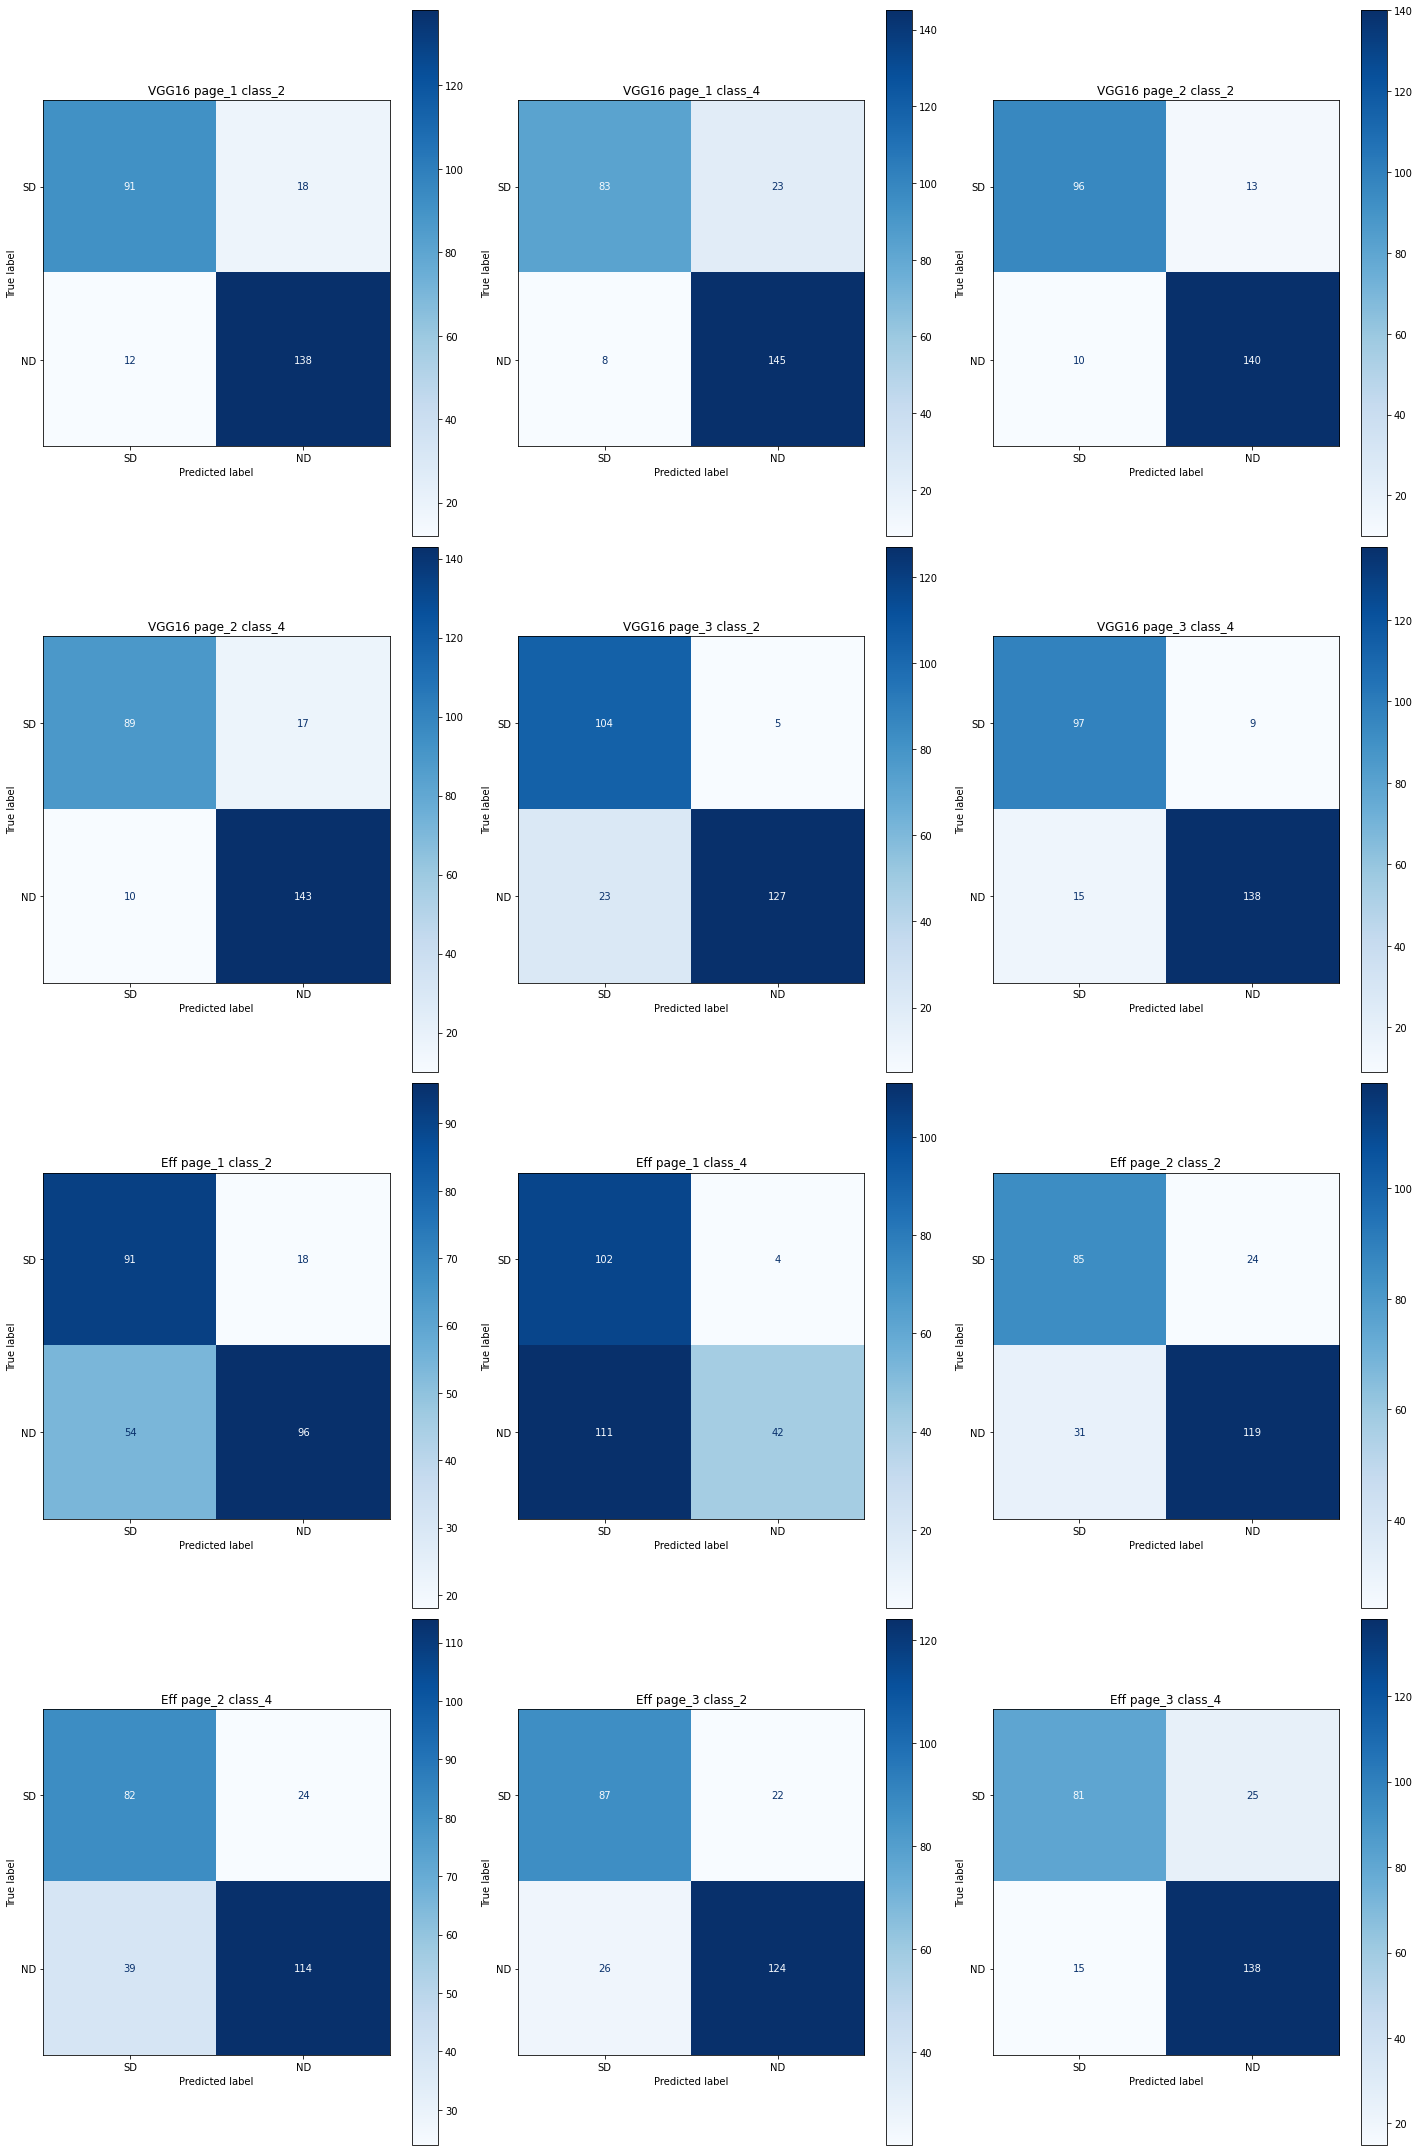

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nrows = len(analytics)//3 + len(analytics)%3

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,30))

for result, ax in zip(analytics, axes.flatten()):
    matrix = confusion_matrix(result.test_targets, result.test_preds)
    labels = ['SD','ND']
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    disp.plot(cmap='Blues', ax=ax)
    ax.title.set_text(result.architecture)
plt.tight_layout()  
plt.show()

In [13]:
plt = reporting_util.make_loss_plots(analytics,training_name='validation')
plt.show()